# **Analisis Kesehatan Lansia Berdasarkan National Poll on Healthy Aging (NPHA)**

## Pendahuluan
Kesehatan lansia merupakan isu penting yang semakin mendapatkan perhatian seiring meningkatnya jumlah penduduk usia lanjut di banyak negara, termasuk Amerika Serikat. Lansia menghadapi berbagai tantangan kesehatan fisik, mental, dan sosial yang memerlukan perhatian khusus dari penyedia layanan kesehatan, pembuat kebijakan, dan masyarakat luas.

Untuk mendukung pengambilan kebijakan dan intervensi yang berbasis data, survei dan polling menjadi salah satu cara untuk memperoleh wawasan langsung dari populasi lansia. Salah satu sumber data yang kredibel dan kaya informasi adalah National Poll on Healthy Aging (NPHA) yang dilakukan oleh University of Michigan. Survei ini menyajikan opini dan pengalaman orang dewasa berusia 50 hingga 80 tahun terkait berbagai isu kesehatan.

# Data Understanding

## Sumber Data
Dataset dapat diakses pada tautan berikut:

https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)

Dataset ini dikembangkan oleh University of Michigan dan berbasis pada polling nasional yang dikumpulkan dari 2017 hingga 2023. Setiap polling mengangkat topik kesehatan yang berbeda, seperti penggunaan teknologi dalam layanan kesehatan, vaksinasi, penggunaan obat tidur, dukungan keluarga, dan lainnya.

## Tujuan
Tujuan utama dari dataset ini adalah untuk:

- Memberikan data berbasis populasi mengenai pandangan dan pengalaman lansia terkait isu kesehatan tertentu.

- Memungkinkan peneliti dan pembuat kebijakan melakukan analisis dan merancang intervensi berbasis data.

- Menyediakan dasar untuk prediksi kecenderungan kesehatan dan perilaku lansia dalam berbagai aspek.

Dalam konteks machine learning, dataset ini dapat digunakan untuk:

- Memprediksi kebutuhan atau risiko kesehatan tertentu berdasarkan karakteristik demografis dan respons survei.

- Mengelompokkan lansia berdasarkan kesamaan pola dalam jawaban mereka (clustering).

- Menganalisis tren dari tahun ke tahun berdasarkan tema survei.



## Integrasi Data
untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

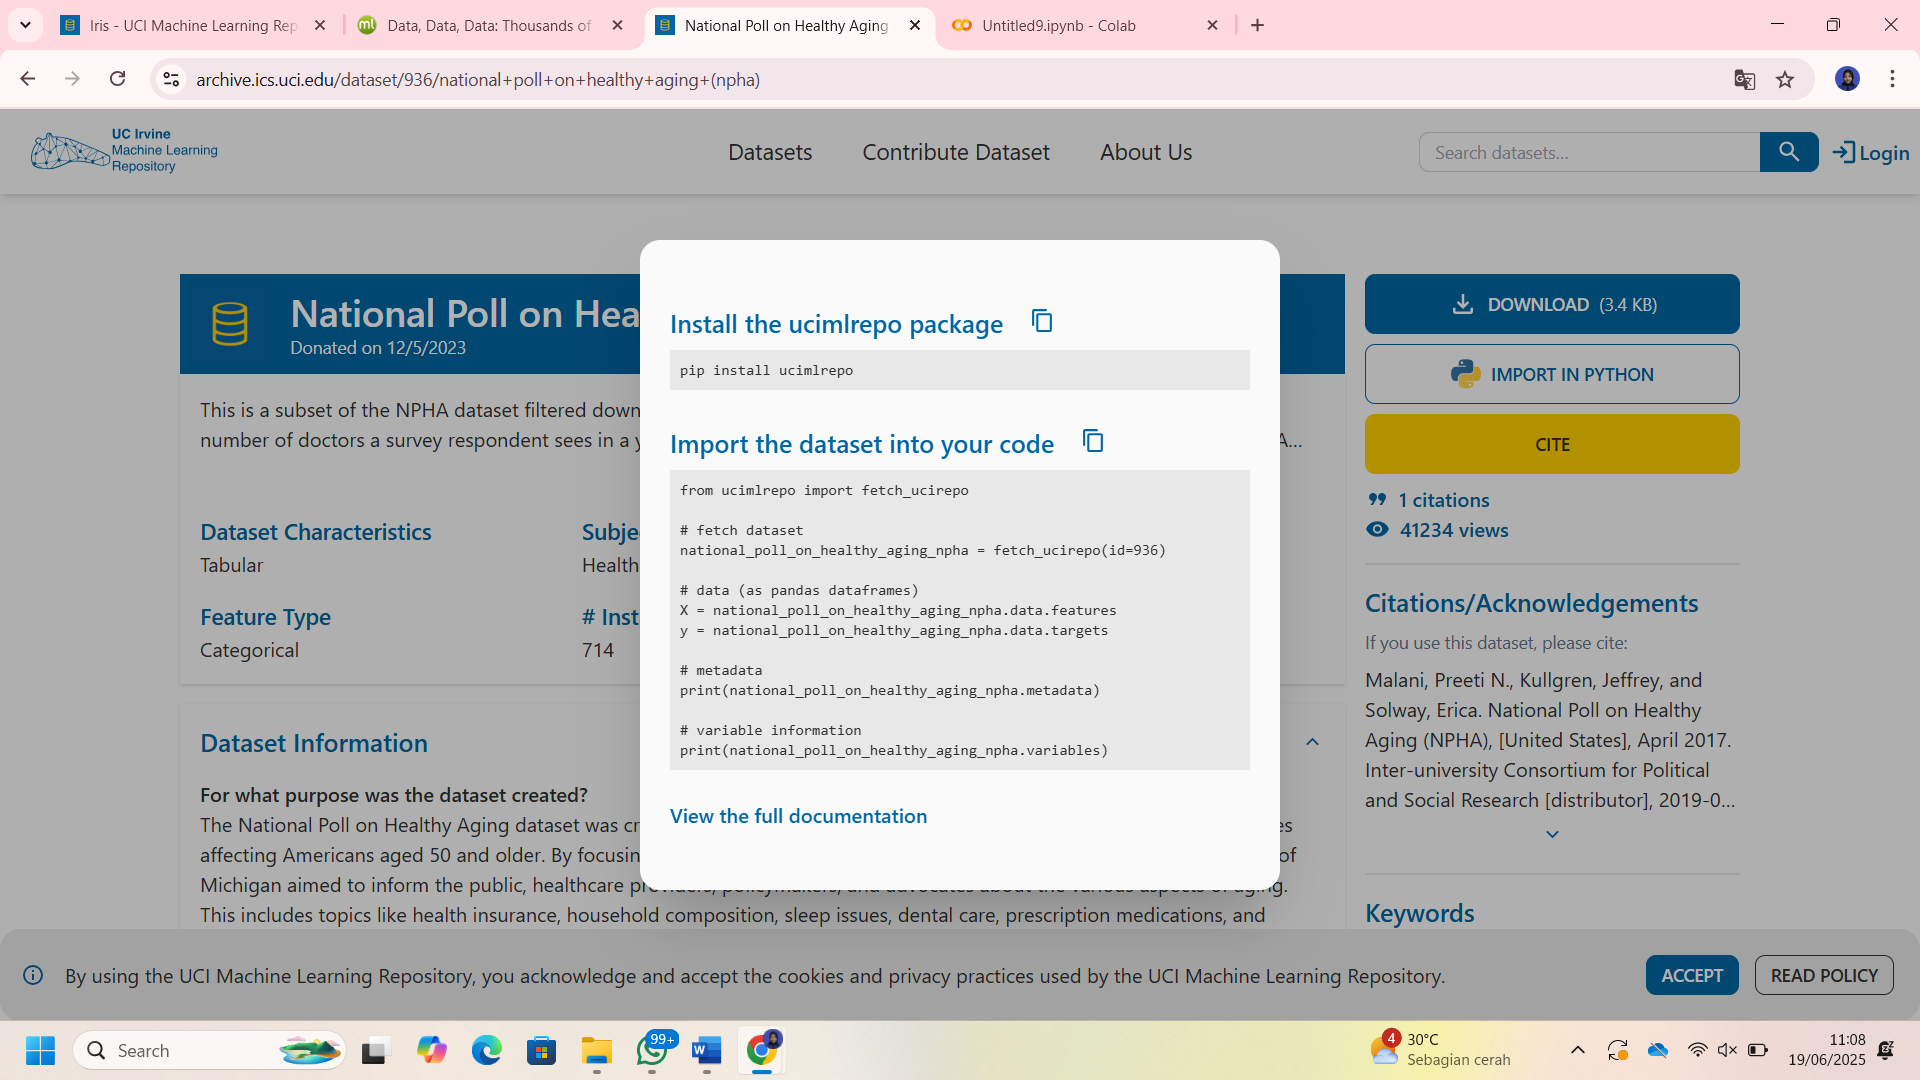

# Eksplorasi Data

Dataset ini tidak ada outlier dan tidak ada missing value

In [21]:
%pip install ucimlrepo

In [23]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936)

# data (as pandas dataframes)
X = national_poll_on_healthy_aging_npha.data.features
y = national_poll_on_healthy_aging_npha.data.targets

# metadata
print(national_poll_on_healthy_aging_npha.metadata)

# variable information
print(national_poll_on_healthy_aging_npha.variables)


{'uci_id': 936, 'name': 'National Poll on Healthy Aging (NPHA)', 'repository_url': 'https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)', 'data_url': 'https://archive.ics.uci.edu/static/public/936/data.csv', 'abstract': 'This is a subset of the NPHA dataset filtered down to develop and validate machine learning algorithms for predicting the number of doctors a survey respondent sees in a year. This dataset’s records represent seniors who responded to the NPHA survey.\n', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 714, 'num_features': 14, 'feature_types': ['Categorical'], 'demographics': ['Age', 'Race', 'Gender'], 'target_col': ['Number_of_Doctors_Visited'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Mon Dec 11 2023', 'dataset_doi': 'https://doi.org/10.3886/ICPSR37305.v1', 'creators': [], 'intro_paper': {'ID': 3

# Visualisasi Data



In [24]:
import pandas as pd

# Gabungkan fitur dan target
df_healthy = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_healthy))
print("Visualisasi dataset healthy")
print(df_healthy.to_string(index=False))


Total baris dataset ini adalah = 714
Visualisasi dataset healthy
 Age  Physical_Health  Mental_Health  Dental_Health  Employment  Stress_Keeps_Patient_from_Sleeping  Medication_Keeps_Patient_from_Sleeping  Pain_Keeps_Patient_from_Sleeping  Bathroom_Needs_Keeps_Patient_from_Sleeping  Uknown_Keeps_Patient_from_Sleeping  Trouble_Sleeping  Prescription_Sleep_Medication  Race  Gender  Number_of_Doctors_Visited
   2                4              3              3           3                                   0                                       0                                 0                                           0                                   1                 2                              3     1       2                          3
   2                4              2              3           3                                   1                                       0                                 0                                           1                              

In [16]:
# Simpan ke file CSV
df_healthy.to_csv('datasethealthy.csv', index=False)

# Preprocessing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# === 1. Load data ===
data = pd.read_csv('/content/datasethealthy.csv')


# === 3. Tentukan target dan fitur ===
target = 'Trouble_Sleeping'
X = data.drop(columns=[target])
y = data[target]

# === 4. Ubah semua fitur menjadi string (simulasi kategorikal) ===
X = X.astype(str)

# === 5. Encode fitur-fitur kategorikal ===
le_dict = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# === 6. Encode target ===
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# === 7. Split data menjadi data latih dan uji ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Modelling

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

### Modelling Klasifikasi Dataset National Poll on Healthy Aging (NPHA) menggunakan Decision Tree

Tujuan dari pemodelan ini adalah untuk **memprediksi tingkat gangguan tidur (`Trouble_Sleeping`)** yang dialami lansia berdasarkan sejumlah fitur yang berkaitan dengan kesehatan fisik, kesehatan mental, kebiasaan tidur, status pekerjaan, serta faktor demografis seperti ras dan jenis kelamin.

Kolom `Trouble_Sleeping` digunakan sebagai **target klasifikasi**, yang terdiri dari beberapa kelas kategorikal, misalnya:

* **1**: Tidak pernah mengalami gangguan tidur
* **2**: Kadang-kadang mengalami gangguan tidur
* **3**: Sering mengalami gangguan tidur

*(Asumsi ini bergantung pada definisi kelas dari dataset, bisa disesuaikan sesuai dokumentasi asli dataset)*



### **1. Pembagian Dataset: Data Latih dan Data Uji**

Dataset dibagi menjadi:

* **Training Set (Data Latih)** – 80% data digunakan untuk melatih model.
* **Testing Set (Data Uji)** – 20% data digunakan untuk mengevaluasi performa model terhadap data baru.



### **2. Pra-Pemrosesan Data**

Sebelum pelatihan model dilakukan, beberapa langkah pra-pemrosesan dijalankan:

* **Target variabel adalah `Trouble_Sleeping`**

* Semua fitur prediktor seperti:

  * `Age`, `Physical_Health`, `Mental_Health`, `Dental_Health`
  * Faktor penyebab gangguan tidur:
    `Stress_Keeps_Patient_from_Sleeping`,
    `Medication_Keeps_Patient_from_Sleeping`,
    `Pain_Keeps_Patient_from_Sleeping`,
    `Bathroom_Needs_Keeps_Patient_from_Sleeping`,
    `Uknown_Keeps_Patient_from_Sleeping`
  * serta fitur lainnya seperti `Employment`, `Race`, `Gender`, `Number_of_Doctors_Visited`
    telah berbentuk **numerik** dan tidak membutuhkan encoding tambahan.

* **Tidak diperlukan normalisasi** karena algoritma Decision Tree mampu menangani data numerik kategori.



### **3. Pelatihan Model Decision Tree**

Model klasifikasi yang digunakan adalah **Decision Tree Classifier**, yang memiliki karakteristik:

* Mampu bekerja langsung dengan fitur numerik dan kategorikal
* Menggunakan **impurity (seperti Gini Index)** untuk memutuskan pemisahan data
* Membangun pohon secara rekursif hingga batas tertentu

Parameter model:

* **Kriteria pemisahan**: `gini`
* **Maksimal kedalaman pohon**: `5`
  (untuk mencegah overfitting dan menjaga interpretabilitas model)



### **4. Evaluasi Model**

Setelah pelatihan selesai, model dievaluasi dengan metrik:

* **Akurasi**: Seberapa besar proporsi prediksi model yang tepat.
* **Classification Report**: Precision, Recall, dan F1-score untuk masing-masing kelas `Trouble_Sleeping`.
* **Confusion Matrix**: Untuk melihat detail kesalahan klasifikasi.

Pohon keputusan juga divisualisasikan untuk:

* Melihat urutan pengambilan keputusan,
* Mengetahui fitur mana yang paling berpengaruh terhadap prediksi gangguan tidur.



### **5. Prediksi dan Interpretasi**

Model ini dapat digunakan untuk:

* **Memprediksi tingkat gangguan tidur** pada lansia berdasarkan kondisi fisik, mental, dan faktor lingkungan.
* **Menganalisis fitur penting**, seperti pengaruh `Stress_Keeps_Patient_from_Sleeping`, `Mental_Health`, atau `Number_of_Doctors_Visited` terhadap gangguan tidur.



### **Kesimpulan**

Decision Tree merupakan algoritma yang sangat cocok digunakan untuk kasus klasifikasi `Trouble_Sleeping` karena:

* Mampu menangani data kategorikal dan numerik secara langsung
* Tidak membutuhkan normalisasi atau scaling
* Memberikan interpretasi visual melalui struktur pohon
* Efektif untuk dataset berskala kecil hingga sedang seperti ini

Model ini dapat membantu pihak medis atau pengelola layanan lansia dalam mengenali pola gangguan tidur dan melakukan intervensi yang tepat.





Akurasi: 0.5244755244755245

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.50      0.08      0.13        13
           2       0.45      0.51      0.48        57
           3       0.59      0.62      0.60        73

    accuracy                           0.52       143
   macro avg       0.51      0.40      0.40       143
weighted avg       0.53      0.52      0.51       143



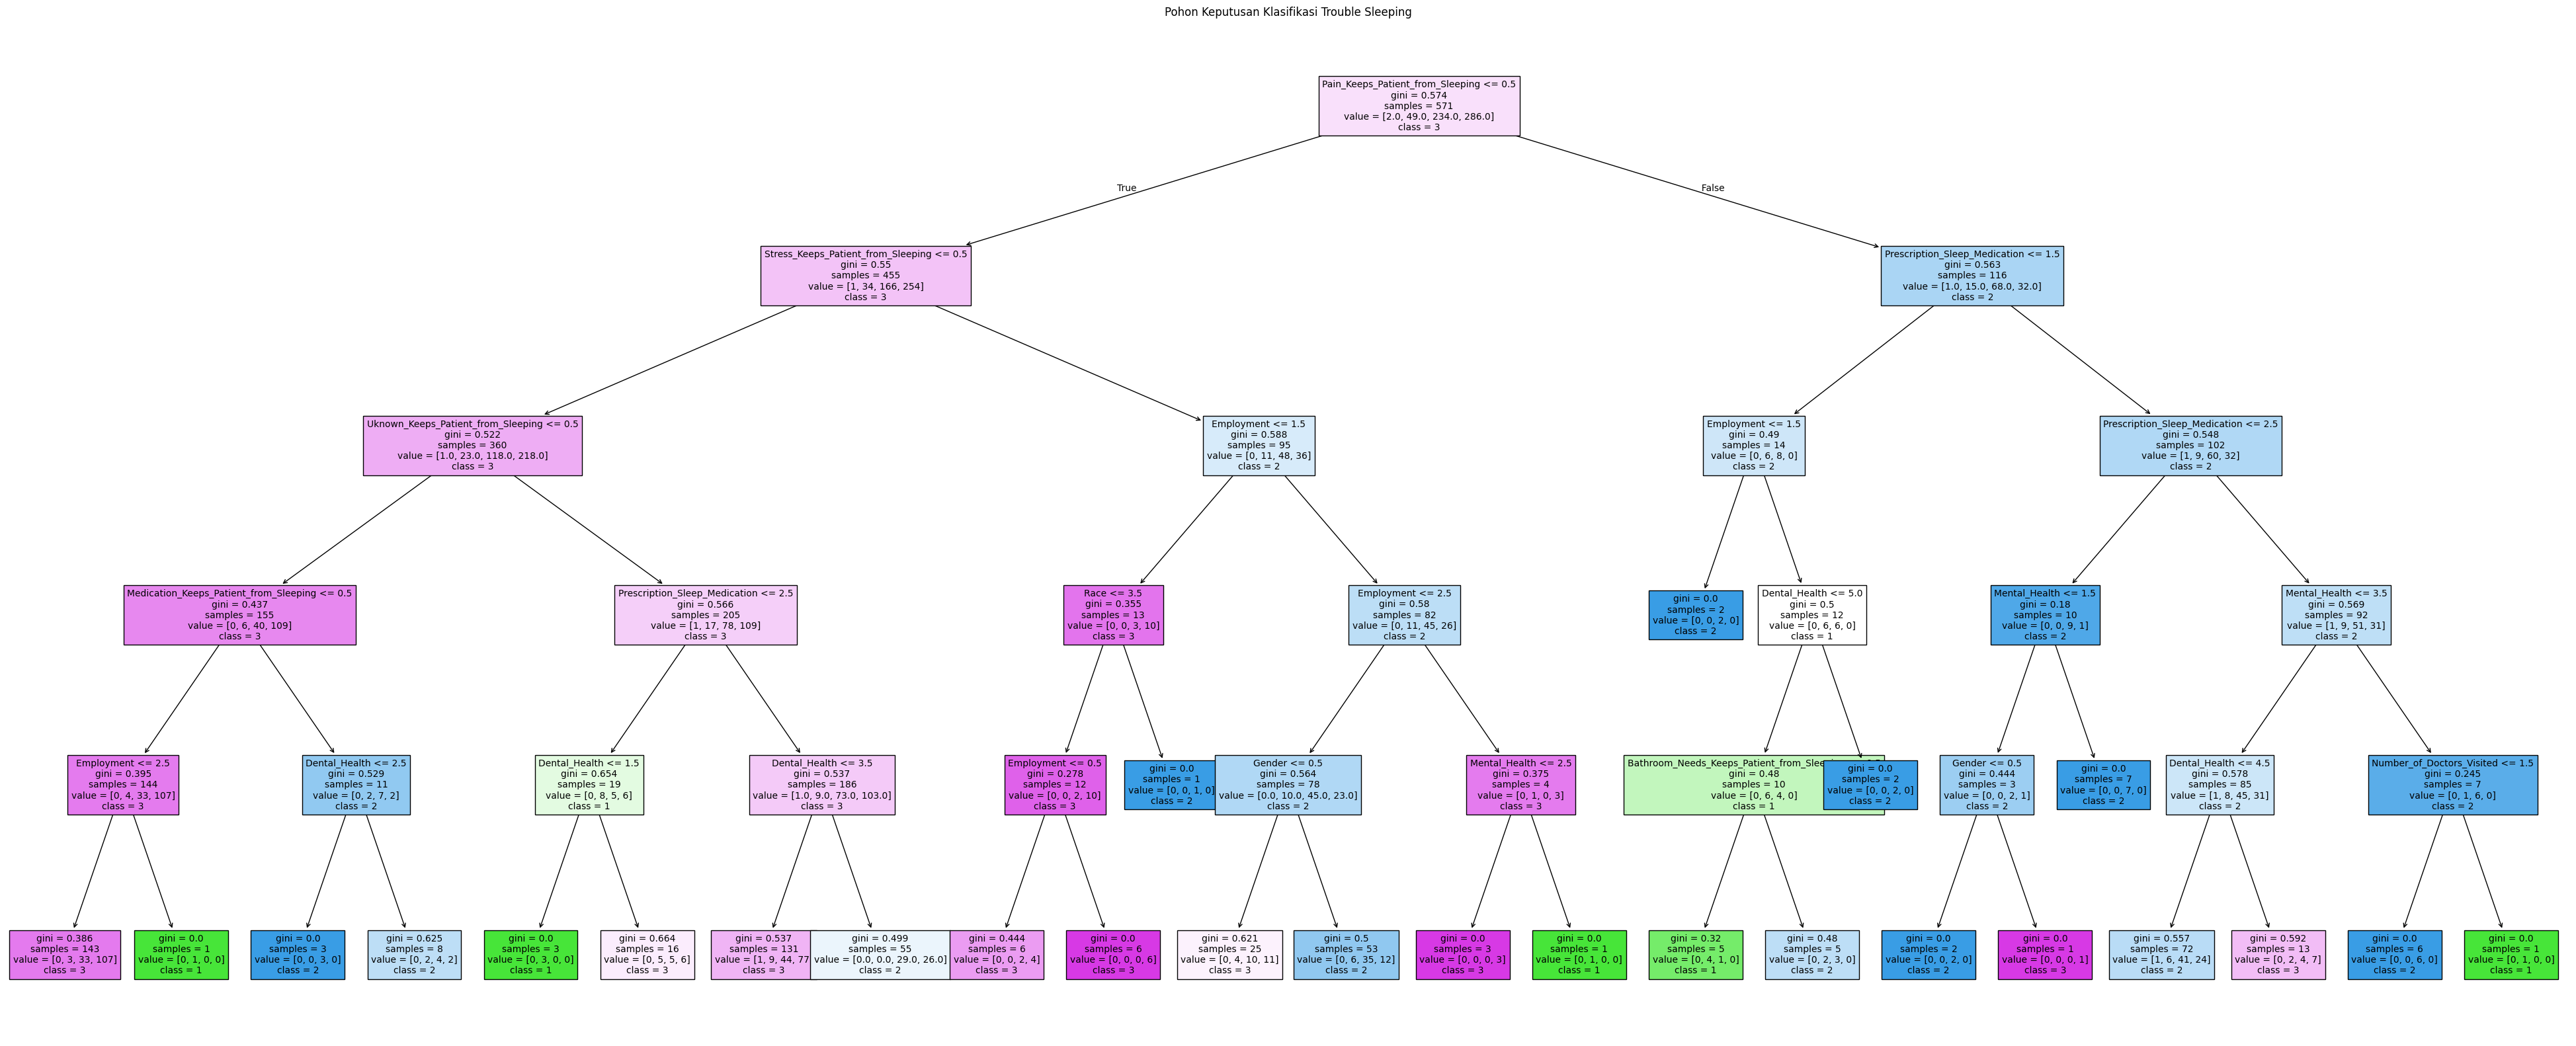

In [32]:
# === 8. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 9. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 10. Visualisasi Struktur Pohon ===
plt.figure(figsize=(50, 20))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=le_target.classes_.astype(str),
    filled=True,
    fontsize=10
)
plt.title("Pohon Keputusan Klasifikasi Trouble Sleeping")
plt.show()


### Modelling Klasifikasi Dataset National Poll on Healthy Aging (NPHA) menggunakan Categorical Naive Bayes

Pemodelan ini bertujuan untuk **memprediksi tingkat gangguan tidur (`Trouble_Sleeping`)** yang dialami oleh lansia berdasarkan sejumlah fitur kesehatan dan faktor demografis. Masalah ini diformulasikan sebagai **klasifikasi multikelas**, dengan label target adalah nilai dari kolom `Trouble_Sleeping`.

Fitur-fitur prediktor mencakup kondisi fisik dan mental (`Physical_Health`, `Mental_Health`), gangguan tidur spesifik (`Stress_Keeps_Patient_from_Sleeping`, `Pain_Keeps_Patient_from_Sleeping`, dll.), serta faktor sosial seperti `Employment`, `Gender`, dan `Race`.



### **1. Pembagian Dataset: Data Latih dan Data Uji**

Dataset dibagi menjadi dua bagian:

* **Training Set (Data Latih)** – 80% dari data total digunakan untuk melatih model.
* **Testing Set (Data Uji)** – 20% sisanya digunakan untuk menguji performa model pada data yang belum pernah dilihat.

Pemilihan rasio 80:20 bertujuan untuk memberi model cukup data untuk belajar, sekaligus menyisakan data yang cukup untuk evaluasi objektif.



### **2. Pra-Pemrosesan Data**

Sebelum dimasukkan ke dalam model Naive Bayes, dataset melalui tahap pra-pemrosesan berikut:

* **Label target** adalah `Trouble_Sleeping`, yang diasumsikan bernilai diskret (1, 2, 3) dan merepresentasikan tingkat gangguan tidur.
* **Fitur prediktor** meliputi semua kolom lainnya, seperti:

  * `Age`, `Physical_Health`, `Mental_Health`, `Dental_Health`
  * Penyebab gangguan tidur:
    `Stress_Keeps_Patient_from_Sleeping`,
    `Medication_Keeps_Patient_from_Sleeping`,
    `Pain_Keeps_Patient_from_Sleeping`,
    `Bathroom_Needs_Keeps_Patient_from_Sleeping`,
    `Uknown_Keeps_Patient_from_Sleeping`
  * Faktor demografis: `Employment`, `Race`, `Gender`, `Number_of_Doctors_Visited`

Karena model Naive Bayes (khususnya `CategoricalNB`) **berasumsi data input berupa kategori diskret**, dan semua fitur sudah dalam bentuk bilangan bulat (diskret), maka tidak diperlukan encoding tambahan atau normalisasi.



### **3. Pelatihan Model Naive Bayes**

Model yang digunakan adalah **Naive Bayes Kategorikal** (`CategoricalNB`) dari pustaka `scikit-learn`. Algoritma ini bekerja dengan prinsip:

* Mengasumsikan bahwa semua fitur bersifat **kondisional independen** terhadap satu sama lain (Naive assumption).
* Menghitung probabilitas posterior untuk setiap kelas label (`Trouble_Sleeping`) berdasarkan distribusi nilai fitur.

Naive Bayes sangat cepat dalam proses pelatihan dan tidak memerlukan hyperparameter rumit.



### **4. Evaluasi Model**

Model dievaluasi menggunakan beberapa metrik umum klasifikasi:

* **Akurasi**: Persentase prediksi model yang sesuai dengan label sebenarnya pada data uji.
* **Classification Report**: Menampilkan nilai precision, recall, dan F1-score untuk setiap kelas gangguan tidur.
* **Confusion Matrix**: Matriks yang menggambarkan jumlah prediksi benar dan salah untuk masing-masing kelas, memberikan gambaran detail kesalahan model.



### **5. Prediksi dan Interpretasi**

Model ini dapat digunakan untuk:

* **Memprediksi kategori gangguan tidur** lansia berdasarkan kondisi fisik dan lingkungan mereka.
* **Mengidentifikasi fitur yang paling berpengaruh** melalui distribusi probabilitas, walaupun interpretasi tidak sejelas decision tree.



### **Kesimpulan**

Naive Bayes merupakan pilihan yang tepat untuk klasifikasi `Trouble_Sleeping` pada dataset ini karena:

* Cepat dan efisien, cocok untuk dataset berukuran sedang seperti ini.
* Dapat menangani fitur kategori dengan baik tanpa preprocessing kompleks.
* Memberikan baseline yang baik untuk dibandingkan dengan model lain yang lebih kompleks.

Walaupun asumsi independensi fitur sering kali tidak sepenuhnya akurat, model Naive Bayes tetap terbukti **kompetitif dan efektif** dalam banyak kasus klasifikasi nyata, termasuk dalam domain kesehatan lansia seperti ini.






Akurasi Naive Bayes: 0.6363636363636364


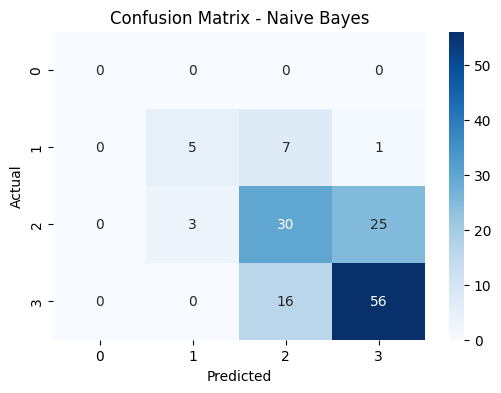

In [35]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Training Naive Bayes ===
gnb = CategoricalNB()
gnb.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = gnb.predict(X_test)
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=gnb.classes_, yticklabels=gnb.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


### Modelling Klasifikasi Dataset Abalone menggunakan K-Nearest Neighbor (K-NN)

Pemodelan ini bertujuan untuk **memprediksi tingkat gangguan tidur (`Trouble_Sleeping`)** pada lansia berdasarkan fitur-fitur kesehatan dan faktor demografis. Target `Trouble_Sleeping` diklasifikasikan dalam beberapa kategori numerik (contohnya 1: tidak terganggu, 2: sedang, 3: berat), dan model akan menentukan kelas tersebut berdasarkan kedekatan data input dengan sampel lainnya.

Metode yang digunakan adalah **K-Nearest Neighbors (K-NN)**, sebuah algoritma **lazy learning** yang menentukan kelas suatu data baru berdasarkan **mayoritas label dari K tetangga terdekatnya** dalam ruang fitur.



### **1. Pembagian Dataset: Data Latih dan Data Uji**

Langkah pertama adalah membagi data menjadi:

* **Training Set (80%)**: digunakan untuk menyimpan contoh-contoh yang akan dijadikan referensi dalam penentuan tetangga terdekat.
* **Testing Set (20%)**: digunakan untuk mengevaluasi performa klasifikasi model pada data yang belum dikenal.

Pembagian dilakukan secara acak agar representatif dan menghindari bias distribusi.



### **2. Pra-Pemrosesan Data**

Sebelum digunakan dalam model K-NN, data dipersiapkan melalui langkah-langkah berikut:

* **Target klasifikasi**: `Trouble_Sleeping`
* **Fitur prediktor** meliputi semua kolom selain target, seperti:

  * `Age`, `Physical_Health`, `Mental_Health`, `Dental_Health`
  * Penyebab tidur terganggu seperti:
    `Stress_Keeps_Patient_from_Sleeping`,
    `Medication_Keeps_Patient_from_Sleeping`,
    `Pain_Keeps_Patient_from_Sleeping`,
    `Bathroom_Needs_Keeps_Patient_from_Sleeping`,
    `Uknown_Keeps_Patient_from_Sleeping`
  * serta `Employment`, `Race`, `Gender`, dan `Number_of_Doctors_Visited`

> Karena algoritma K-NN **berbasis jarak (misalnya Euclidean distance)**, maka **fitur-fitur numerik perlu dinormalisasi** (contoh: MinMaxScaler) agar fitur dengan skala besar tidak mendominasi perhitungan jarak.



### **3. Pelatihan dan Prediksi dengan K-NN**

Tidak seperti model lain yang membangun fungsi eksplisit selama pelatihan, **K-NN menyimpan data pelatihan** dan langsung menghitung jarak saat prediksi:

* Untuk setiap data uji, dihitung jarak ke seluruh data latih.
* Dipilih **K data terdekat** (misalnya `K=5`) berdasarkan jarak tersebut.
* Kelas dari data uji ditentukan berdasarkan **mayoritas kelas dari tetangga-tetangga tersebut**.

Parameter utama yang digunakan:

* **K (jumlah tetangga)**: Misalnya `K=5`
* **Metric**: `Euclidean` atau `Manhattan` distance, tergantung skala data



### **4. Evaluasi Model**

Performa model diukur menggunakan:

* **Akurasi**: proporsi prediksi yang tepat terhadap total data uji.
* **Classification Report**: precision, recall, dan F1-score untuk tiap kelas `Trouble_Sleeping`.
* **Confusion Matrix**: untuk mengetahui distribusi prediksi terhadap kelas asli.

Selain itu, eksperimen juga dapat dilakukan untuk memilih **nilai K yang optimal** dengan metode seperti **cross-validation**.



### **5. Prediksi dan Interpretasi**

Model ini dapat digunakan untuk:

* **Memprediksi gangguan tidur** pasien lansia berdasarkan fitur input mereka.
* Memberi pemahaman tentang **kemiripan antara pasien**—misalnya, jika seorang lansia memiliki pola kesehatan yang mirip dengan pasien lain yang mengalami gangguan tidur tingkat tinggi, maka ia juga berpotensi mengalaminya.

Meskipun K-NN tidak menawarkan interpretasi eksplisit seperti Decision Tree, pendekatan ini **sangat intuitif secara spasial** dan mudah diterapkan.



### **Kesimpulan**

K-Nearest Neighbors cocok digunakan untuk klasifikasi `Trouble_Sleeping` dalam dataset ini karena:

* **Sederhana dan efektif**, terutama untuk dataset berskala sedang seperti ini.
* Tidak memerlukan pelatihan kompleks, cukup menyimpan data latih.
* Dapat bekerja baik selama **fitur distandarisasi dengan benar**.
* Memungkinkan eksperimen terhadap nilai `K` untuk mendapatkan performa optimal.

Namun, perlu diperhatikan bahwa model ini memiliki **biaya prediksi tinggi** dan bisa lambat jika jumlah data sangat besar.





Akurasi KNN: 0.4965034965034965


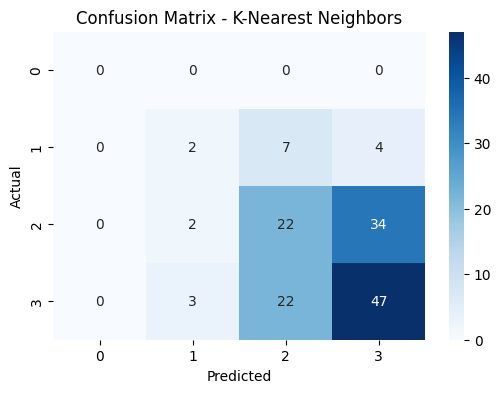

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Training KNN ===
knn = KNeighborsClassifier(n_neighbors=5)  # Kamu bisa ubah jumlah tetangga (k) di sini
knn.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = knn.predict(X_test)
print("Akurasi KNN:", accuracy_score(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=knn.classes_, yticklabels=knn.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()


## Evaluasi Data

Dari dataset National Poll on Healthy Aging (NPHA), akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

* Decision Tree = 52,45%
* Categorical Naive Bayes = 63,64%
* K-Nearest Neighbor = 49,65%

Dari ketiga model diatas dapat disimpulkan bahwa Decision Tree memiliki akurasi tertinggi yaitu 63,64%.